<a href="https://colab.research.google.com/github/SWEN90006/tutorial-solutions/blob/main/SWEN90006_Tutorial_2_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SWEN90006 Tutorial 2 solutions

## Question 1:

What is the input domain for the LWIG program? What are the input conditions for the LWIG program?

**Answer**

The trick here is to think in terms of the logical input variables to
the program and then to break this down further into the fields. The
input is a file consisting of the following logical *field* variables.
The fields and their input domains and input conditions are as
follows.

-  Student number --- The input domain of student number is the set of strings.

 The input condition here is that the student number must be a string
 consisting of 5 digits, 6 digits or 9 digits. We can formalise this if
 we wish by saying that our logical field variable student_no must
 satisfy the input condition:
 
   $${student\_no}\in\{ S \mid length[S] = 5 \land for~each~i~in~the~domain~of~S,~S[i] \in digits\}$$ 
     OR
   $${ student\_no}\in\{ S \mid length[S] = 6 \land for~each~i~in~the~domain~of~S, ~S[i] \in digits\}$$ 
     OR
   $${student\_no}\in\{ S \mid length[S] = 9 \land for~each~i~in~the~domain~of~x, ~S[i] \in digits\}$$

  where digits is the set of characters $0-9$.
 
-  Month of birth and day of birth --- It does not make much sense to treat months and days in isolation *because of the dependency between days and months*.

 Unfortunately, building up this sort of judgement is part of building
 up the experience in testing. Since the logical variables here are
 three letter strings and integers in a range the input domain here can
 be considered to be pairs of (Strings, Integers).

 The input condition is that for any pair (Month, Date) we must have

$$\begin{array}{lll}
Month & = & Jan  ~  and  ~ Date \in [1, 31] \\
Month & = & Feb  ~  and  ~ Date \in [1, 29] \\
Month & = & Mar  ~  and  ~ Date \in [1,31] \\
....
\end{array}
$$

                            
-  Family name --- The input domain for this field is the set String.
 The input condition is that all elements of the string must be capital
 letters; that is, given a family name S, then for each
 $ 0\leq i \leq length[S] -1$, we have $ S[i]\in A-Z$.
 
 
-  Initial --- Likewise, the input domain for the student's initial is set Char. 
The input condition is that $initial \in A-Z$ .
 
-  No. of lectures during which the student slept --- The input domain is
 the set of integer. The input condition is that the number of
 lectures is between 0 and 24; that is, $ 0\leq slept
   \leq 24$.
   
-  Finally, we must not forget the input file. The input domain is the
 set of all files that can be read. The input condition is that there
 is at least one record in the file, and that for every record in the
 file, every field in that record conforms to the input conditions
 above.

## Question 2:

Derive input test-cases for the program using equivalence partitioning and boundary value analysis. 

**Answer**
First, we examine each requirement, which relates to specific variables:

-  Student number --- Applying to guideline 2, there are four equivalence
 classes: strings of 5 digit numbers, strings of 6 digit numbers and
 strings of 9 digit numbers, and anything else.

 The **valid** classes are the sets of 5 digit, 6 digit and 9 digit
 strings,  The **invalid** classes are all other strings:
 
$$\begin{array}{lll}
EC_{5} & = & \{ S \mid  length[S] = 5 \land for~each~i~in~the~domain~of~S,~S[i] \in digits\} \\
EC_{6} & = & \{ S \mid  length[S] = 6 \land for~each~i~in~the~domain~of~S, ~S[i] \in digits\} \\
EC_{9} & = & \{ S \mid  length[S] = 9 \land for~each~i~in~the~domain~of~S, ~S[i] \in digits\} \\ 
EC_{invalid} & = & \{ S \mid any \ other \ strings\} 

\end{array}
$$
  
 
  where digits is the set of characters $\sf 0\mbox{--}9$.




- Months and day of birth --- Use guideline 2 for months. In theory, we should select 13 different cases: one for each month Jan-Dec, and one for an invalid month. However, this may be overkill. To keep it
 simple, we choose one month with 31 days (Jan), one with 30 days
 (Nov), and one with 28 days (Feb), and an invalid case of something
 other than a month, but choosing all 12 months would also be fine.

 Then, apply guideline 1 to the possible dates of each. It is important
 that we test the number of dates for Jan, Feb, and Nov, because the
 behaviour is different for months of different lengths (Note, we ignore the leap year/non-leap year distinction here):

$$\begin{array}{lll}
EC_{Valid Jan}  &  =  & \{(Month,Date) \mid   Month = Jan)~and~Date \in [1, 31]\} \\
EC_{InValid Jan\_1} &  =  & \{(Month,Date) \mid   Month = Jan)~and~Date < 1\} \\
EC_{InValid Jan\_2} &  =  & \{(Month,Date) \mid   Month = Jan)~and~Date > 31\} \\
...   ~~~~~ Similar~for~Feb~and~Nov \\
EC_{Invalid~M}   &     =  &  \{ (M, D) \mid M \not\in \{Jan, Feb, ...\}\}
\end{array}
$$

 Applying this to the leaf nodes of the length of the student number,
 the assumption is that the length of the student number is independent
 of the month, so we apply it just to one of those leaf nodes: length
 of 6. This choice is arbitrary.

-  Family name --- The input condition gives a set of valid inputs so use guideline 5 again to get:

$$\begin{array}{lll}
EC_{Valid~ FN}   &  =  & \{ S \mid S[i] \in A-Z~for~each~0 \leq i \leq length[S] - 1\} \\
EC_{Invalid~ FN} &  =  & \{ S \mid S[i] \not\in A-Z~for~some~0 \leq i \leq length[S] - 1\}
\end{array}
$$

   
  Again, we feel that this is independent of dates or student numbers, so we aribtrarily pick a valid leaf node to apply it to: Nov.
    
-  The Initial -- Using guideline 5, we get a valid EC $ EC_{Valid~I}$
 of all capital letters and an invalid EC $EC_{Invalid~I}$ of all
 characters except those in $EC_{Valid~I}$.

- The no. of lectures slept through --- The input condition gives a
 range of values and so use guideline 1. This gives one valid EC and
 two invalid ECs as follows:
 
$$\begin{array}{lll}
    EC_{Valid~Sleeps} & = &  [0, 24]\\
    EC_{Invalid~Sleeps_1} & = & \{S \mid S < 0\}\\
    EC_{Invalid~Sleeps_1} & = & \{S \mid S > 24\}\\
 \end{array}
$$

-  Additionally, we should test that the program can handle cases of 0,
 1, and many records in a file. These could be included with the
 existing test cases above, but we omit for brevity.
 
  The resulting test template tree is shown in
 Figure [1](#fig:lwig-ttt).

  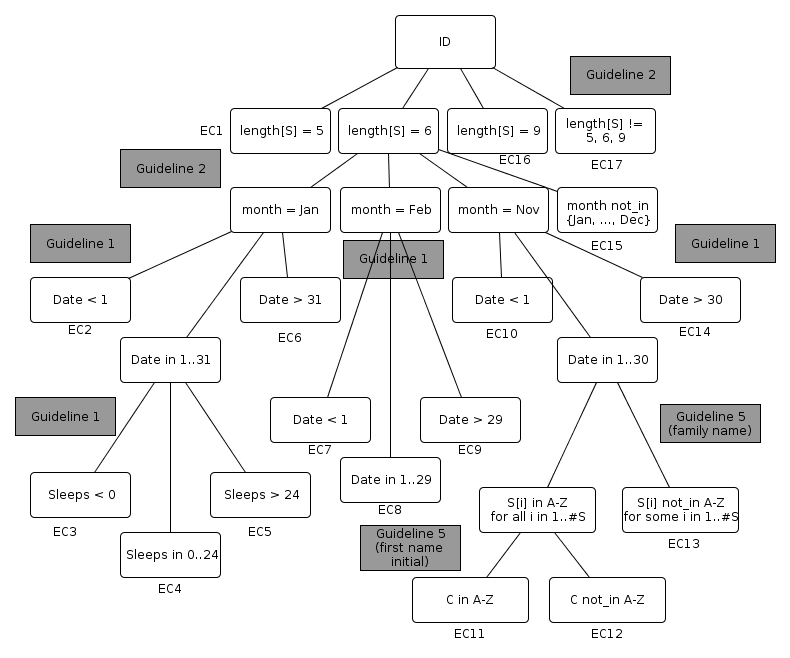
    <center>
    Figure 1:  Test template tree for the LWIG program. 
    </center>

  Note: For simplicity, we didn't express the condition that student number must contain digits only. An example of the full caption should be something like "length[S] = 5 && S contains digits only". Also, it's a good practise to test these two input conditions independently, which means, one partition in the test template tree applying guideline 2 on condition "length[S] is one of 5,6,9" and another partition applying guideline 5 on condition "S contains digits only". 
    
    
### Selecting test cases
 
Once we identified the equivalence classes, we assume any value from an equivalence class is as likely to produce a failure as any other value in that class. Therefore, if we select test case only based on equivalence partitioning, selecting one arbitrary element from one equivalence class is sufficient. If the equivalence class does not specify the condition of some parts of the input, the best practice is to choose a valid one. 

However, using boundary-value analysis, rather than selecting one arbitrary test from the EC, we need to generate test cases using all the on-point and off-point values. Here's how boundary-value analysis works:

For the day of a month, we select test cases including the first and last day of the month as on-points, and invalid dates either side as off-points; similarly for the number of date slept. 

For Jan, we have:

   Date = 1    (on point)    
   Date = 31   (on point)    
   Date = 0    (off point)   
   Date = 32   (off point)

 For the lengths, we need to select lengths of 5, 6 and 9 as on-points,
 and 4, 7, 8, and 10 as off points. Note that the off points of 6 for
 length\[S\] = 5 and 5 for length\[S\] = 6 are already tested as on
 points for each other.

 For EC13, the 'for some i in 1..S#', we can have 0 or $ > $ 0 such
 occurences of lower-case letters, so the on point is 0 (which falls
 into EC12) and the off point is 1 lower-case letter.

 For $c$ in $A-Z$, we use the ASCII chart to find the off point of `@`
 (the character immediately below A) and `[` (the character immediately
 above Z).

The resulting tests are listed below, with EC1-17 referring to the labels on the test template tree in Figure 1

$$\begin{array}{lll}
EC1 & {\small\tt 12345:Jan:1:ABC:A:0} & \textrm{on point}~length[S] = 5\\
    & {\small\tt 1234:Jan:1:ABC:A:0}  & \textrm{off point below}~length[S] = 5\\
EC2 & {\small\tt 123456:Jan:0:ABC:A:1} & \text{off point for}~Date < 1\\
EC3 & {\small\tt 123456:Jan:1:ABC:A:-1} & \text{off point for}~Sleeps < 0\\
EC4 & {\small\tt 123456:Jan:1:ABC:A:0}  & \text{on point for}~Sleeps < 0~and~Date < 1\\
    & {\small\tt 123456:Jan:31:ABC:A:24}  & \text{on point for}~Sleeps > 24~and~Date > 31\\
EC5 & {\small\tt 123456:Jan:31:ABC:A:25} & \text{off point for}~Sleeps > 24\\
EC6 & {\small\tt 123456:Jan:32:ABC:A:1} & \text{off point for}~Date > 31\\
EC7 & {\small\tt 123456:Feb:0:ABC:A:1} & \text{off point for}~Date < 1\\
EC8 & {\small\tt 123456:Feb:1:ABC:A:1} & \text{on point for}~Date < 1\\
    & {\small\tt 123456:Feb:29:ABC:A:1} & \text{on point for}~Date > 29\\
EC9 & {\small\tt 123456:Feb:30:ABC:A:1} & \text{off point for}~Date > 29\\
EC10 & {\small\tt 123456:Nov:0:ABC:A:1} & \text{off point for}~Date < 1\\
EC11 & {\small\tt 123456:Nov:1:ABC:A:1} & \text{on point for}~Date < 1~and~c < A\\
     & {\small\tt 123456:Nov:30:ABC:Z:1} & \text{on point for}~Date > 30~and~c > Z\\
EC12 & {\small\tt 123456:Nov:1:ABC:@:1} & \text{on point for}~Date < 1~and~\text{off point for}~c < A\\
     & {\small\tt 123456:Nov:30:ABC:[:1} & \text{on point for}~ Date > 30~\text{and off point}~c > Z\\
EC13 & {\small\tt 123456:Nov:30:aBC:A:1} & \text{on point for}~`for~some~i\text{'}\\
EC14 & {\small\tt 123456:Nov:31:ABC:Z:1} & \text{off point for}~ Date > 30\\
EC15 & {\small\tt 123456:NOV:30:ABC:Z:1} & \text{on point for}~ Month~ not~ in~ \{Jan, Feb,..., Dec\}\\
EC16 & {\small\tt 123456789:Nov:30:ABC:Z:1} & \text{on point for}~ length[S] = 9\\
EC17 & {\small\tt 1234567:Nov:30:ABC:Z:1} & \text{off point for}~ length[S] = 6\\
     & {\small\tt 12345678:Nov:30:ABC:Z:1} & \text{off point for}~ length[S] = 9\\
     & {\small\tt 1234567890:Nov:30:ABC:Z:1} & \text{off point for}~ length[S] = 9\\
 \end{array}
$$


## Question 4: Fault finding

There are four faults in the LWIG program: 

- Case insensitive for month: For example, JAN, FEB, and MAR are treated as valid input, to fix this, change `.parseCaseInsensitive()` into `.parseCaseSensitive()` inside `isValidDate` function.

- Unstrict date: For example, Feb 30, Feb 31. To fix this, append another line under `DateTimeFormatter`. See the following Java code.

```java
DateTimeFormatter dtf = new DateTimeFormatterBuilder()
                .parseCaseSensitive()         
                .appendPattern("d-MMM-uuuu")  
                .toFormatter(Locale.ENGLISH)
                .withResolverStyle(ResolverStyle.STRICT);
```

- For the student ID, the length of 10 is also considered as a valid input, which is incorrect. Simply change the regex from `^(\\d{5}|\\d{6}|\\d{9}|\\d{10})$` to `^(\\d{5}|\\d{6}|\\d{9})$`

- The last fault inside the program is the range for the slept count. To fix this issue, use this conditional branch `if (count >= 0 && count =< 24)`.

### Try implement tests without identifying on-point and off-point. 

There is a chance that you miss some of the faults, especially at `length(studentID) == 10` and `sleep == 24`. Try select test cases using any value that is not the on-point and off-point of the boundary, it's very likely that you fail to identify some of the faults. Looking at the faults that we identified, some of them are boundary shifts introduced at boundary conditions. 